**Text Mining and Search - Project Exam**

*P. Formicola* [893791]
&
*A. G. Limone* [903441]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/clickbait_data.csv")

**Exploratory Data Analysis**

Print data and get some highlights.

In [ ]:
data.head(10)

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
5,How To Flirt With Queer Girls Without Making A...,1
6,32 Cute Things To Distract From Your Awkward T...,1
7,If Disney Princesses Were From Florida,1
8,What's A Quote Or Lyric That Best Describes Yo...,1
9,Natalie Dormer And Sam Claflin Play A Game To ...,1


In [ ]:
print(data.head())
print(data.describe())

                                            headline  clickbait
0                                 Should I Get Bings          1
1      Which TV Female Friend Group Do You Belong In          1
2  The New "Star Wars: The Force Awakens" Trailer...          1
3  This Vine Of New York On "Celebrity Big Brothe...          1
4  A Couple Did A Stunning Photo Shoot With Their...          1
          clickbait
count  32000.000000
mean       0.499969
std        0.500008
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


From mean metrics we can see that clickbaits and non-clickbaits titles are almost balanced in the dataset of 32000 titles.

In [ ]:
data.isnull().sum()

headline     0
clickbait    0
dtype: int64

<Axes: xlabel='clickbait', ylabel='count'>

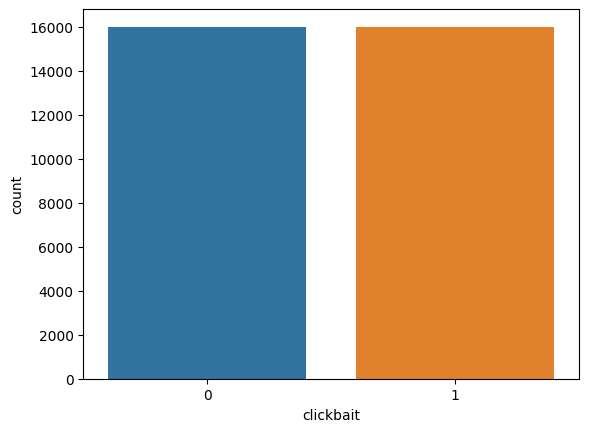

In [ ]:
import seaborn as sns
sns.countplot(x=data.clickbait)

**Findings:**

* The dataset has 32000 rows with 2 columns
* No missing values in all the columns
* Dataset is balanced in number of clickbaits and non-clickbaits

**Preprocessing**

Preprocess the data to remove unwanted characters, convert the text to lowercase, eliminate stopwords, and apply stemming.

In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download('punkt')

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)

    tokens = nltk.word_tokenize(text)

    #Stopwords remov
    tokens = [token for token in tokens if token not in stop_words]

    #Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    preprocessed_text = " ".join(tokens)

    return preprocessed_text

data["preprocessed_text"] = data["headline"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Example of Preprocessing**

In [5]:
example = ["This is a Clickbait Title for sure!", "How to Do Text Preprocessing?", "This is for Text Mining and Search Exam..."]

preprocessed_titles = [preprocess_text(title) for title in example]

for original, preprocessed in zip(example, preprocessed_titles):
    print(f"Original: {original}")
    print(f"Preprocessed: {preprocessed}")
    print()


Original: This is a Clickbait Title for sure!
Preprocessed: clickbait titl sure

Original: How to Do Text Preprocessing?
Preprocessed: text preprocess

Original: This is for Text Mining and Search Exam...
Preprocessed: text mine search exam



Preprocessed sentences seems to retain the most of the body of the original sentence.

* **Text Classification**

**Train and Test Set**

Split data into train and test set for classifying.

In [4]:
from sklearn.model_selection import train_test_split

X = data["preprocessed_text"]
y = data["clickbait"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Extracting Features**

Extract features from the text using a TF-IDF approach.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

**Logistic Regression Classifier**

We trained a Classifier using Logistic Regression ML Algorithm.



In [5]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_vectors, y_train)

LogisticRegression()

**Evaluating Metrics**

We evaluated the classifier using metrics such as Accuracy, Precision, Recall and F1 Score.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.95125
Precision: 0.9716470213443772
Recall: 0.9318667888787046
F1-score: 0.9513412351840299


Confusion Matrix:
 [[3038   89]
 [ 223 3050]]


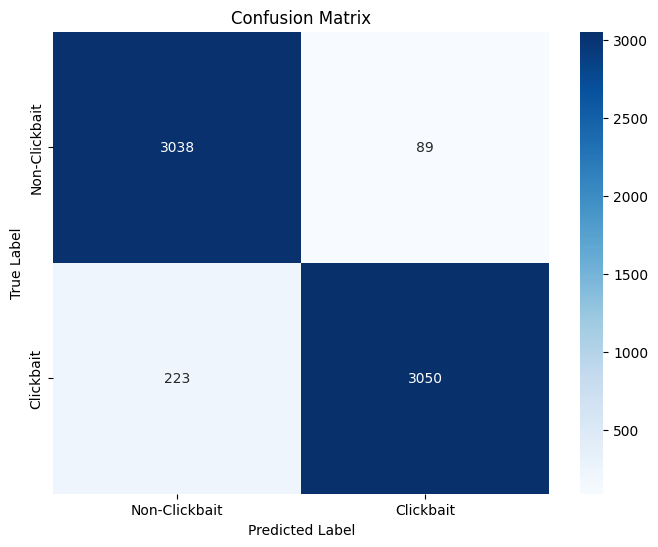

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Clickbait', 'Clickbait'], yticklabels=['Non-Clickbait', 'Clickbait'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Test the Model**

We created the string "Amazing secrets to pass Text Mining exam in just 3 days!" and used our classifier on it.

In [13]:
new_text = ["Amazing secrets to pass Text Mining exam in just 3 days!"]
new_text_preprocessed = preprocess_text(new_text[0])
new_text_vector = vectorizer.transform([new_text_preprocessed])
prediction = classifier.predict(new_text_vector)

print("Prediction:", prediction)

Prediction: [1]


The result of the classifier is 1 = Clickbait, as we expected, unlucky!

**Decision Tree Classifier**

In order to check for a possible better accuracy we used als a decision tree classifier.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train_vectors, y_train)

DecisionTreeClassifier(random_state=42)

After trained the classifier on training data we made predictions on test set.

In [9]:
y_pred = dt_classifier.predict(X_test_vectors)

**Evaluate Performances**

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.90
F1 Score: 0.90


We reached a lower accuracy and lower F1 Score.

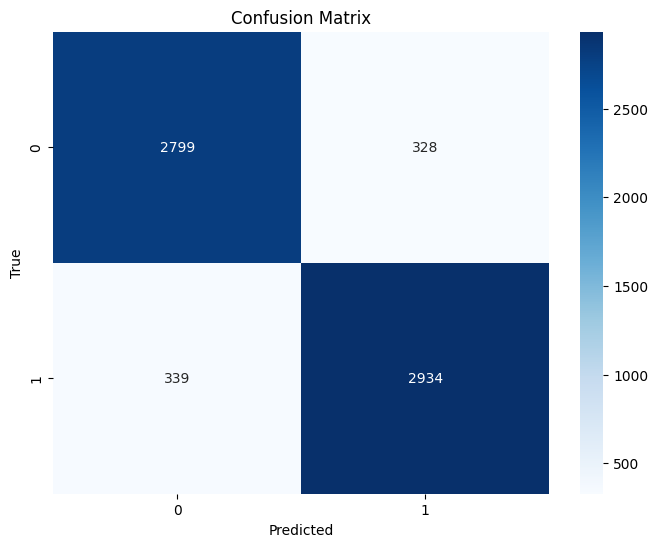

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* **Text Clustering**

Creating the KMeans Algorithm for clustering specifying the presence of two clusters.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['clickbait'], random_state=0)

In [12]:
vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)

In [7]:
NUM_CLUSTERS = 2

In [7]:

km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=100, random_state=42).fit(X_train_transformed)

y_clus_train = km.predict(X_train_transformed)

In [8]:
v_measure = v_measure_score(y_clus_train, y_train)
ari = adjusted_rand_score(y_clus_train, y_train)

print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {ari}")

V-Measure Score: 0.24164460352925554
Adjusted Rand Index: 0.12921755334479962


**PCA and Plot**

To plot the clusters we used PCA to reduce the high-dimensional TF-IDF vectors to 2 dimensions.

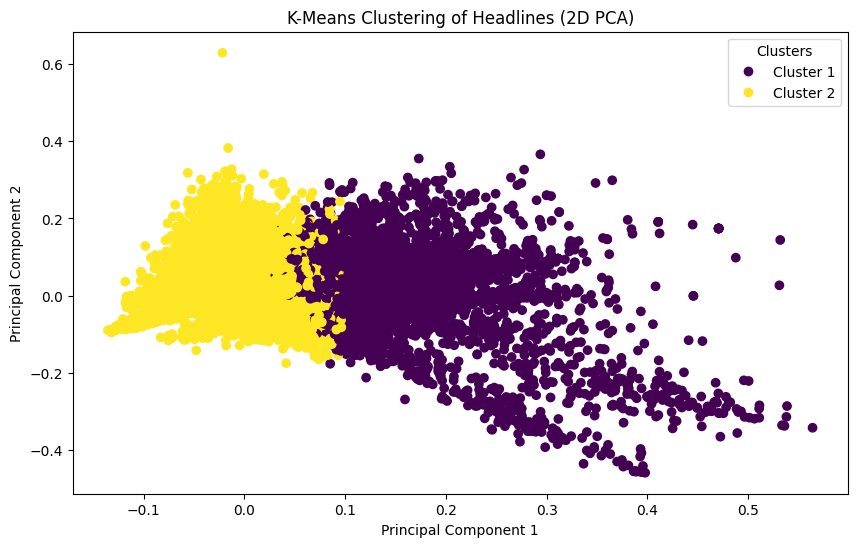

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#transform the TF-IDF vectors using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transformed.toarray())

X_train_with_labels = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_with_labels['Cluster'] = y_clus_train

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_with_labels['PC1'], X_train_with_labels['PC2'], c=X_train_with_labels['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Headlines (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend_labels = ['Cluster 1', 'Cluster 2']
plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.show()

**Elbow Method**

In order to be sure there are no potential hidden labels we try to check the optimal number of clusters with Elbow Method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


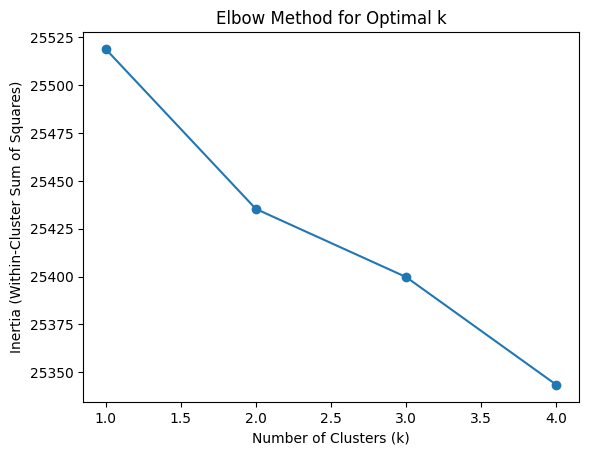

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 5)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_vectors)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

The plots shows that, according to the Elbow Method, the "elbow" is in k=2 clusters.

**Findings**

* An ARI of 0.13 suggests a relatively low similarity between the true labels and the predicted clusters.
* A V-Measure Score of 0.24 indicates that the clustering has some degree of agreement with the true labels, but it may not be very high.